<a href="https://colab.research.google.com/github/Amal632/Amal632/blob/main/Analyse_donnees_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv


In [2]:
import pandas as pd

df = pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
#Explorer le dataset
#Vérifier les colonnes et le type de données
# Voir les colonnes et le type de chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
#Statistiques de base
# Moyenne, min, max, quartiles pour les colonnes numériques
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
#Vérifier les valeurs manquantes
# Combien de valeurs manquantes par colonne
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [6]:
#Voir un aperçu rapide des premières lignes
df.head(10)  # Affiche les 10 premières lignes

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [7]:
#Visualiser les données
#Installer et importer les librairies nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Pour que les graphiques s'affichent dans le notebook
%matplotlib inline

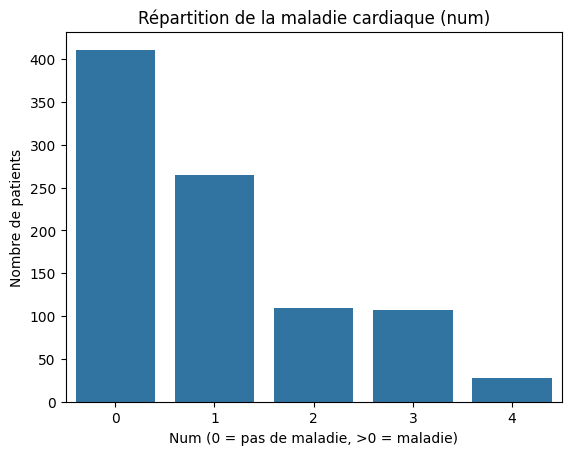

In [9]:
#Répartition des patients avec/sans maladie cardiaque
sns.countplot(x='num', data=df)
plt.title("Répartition de la maladie cardiaque (num)")
plt.xlabel("Num (0 = pas de maladie, >0 = maladie)")
plt.ylabel("Nombre de patients")
plt.show()


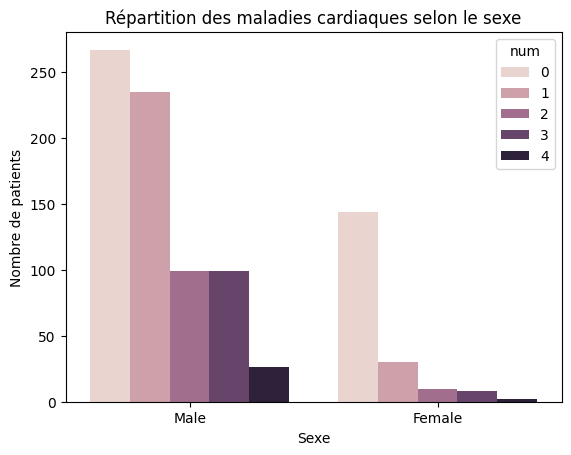

In [10]:
#Répartition par sexe
sns.countplot(x='sex', hue='num', data=df)
plt.title("Répartition des maladies cardiaques selon le sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de patients")
plt.show()

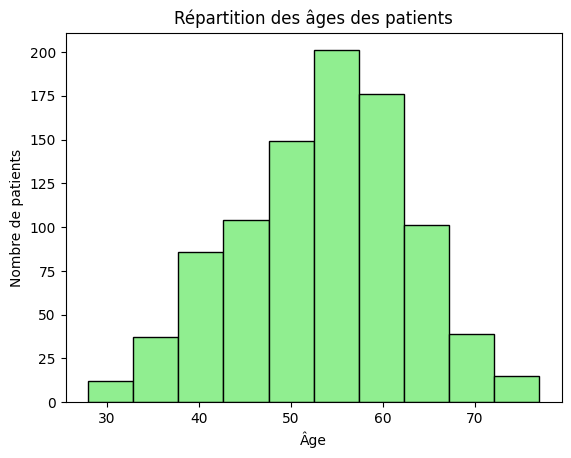

In [11]:
#Répartition par âge
plt.hist(df['age'], bins=10, color='lightgreen', edgecolor='black')
plt.title("Répartition des âges des patients")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.show()

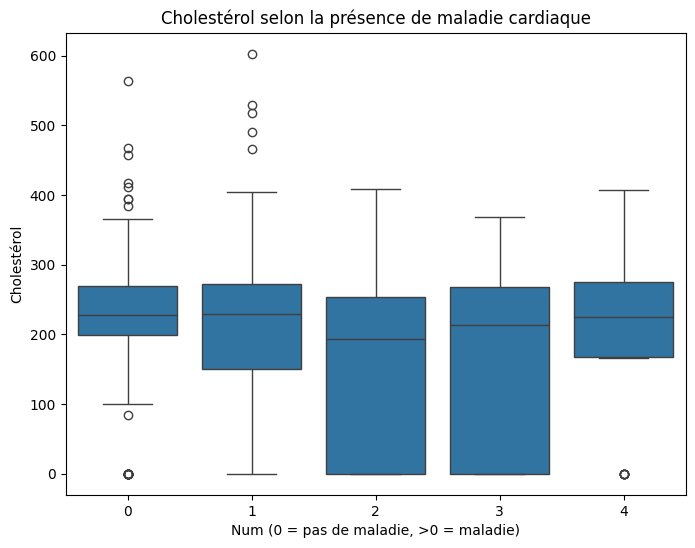

In [12]:
#Cholestérol (chol) et maladie cardiaque
plt.figure(figsize=(8,6))
sns.boxplot(x='num', y='chol', data=df)
plt.title("Cholestérol selon la présence de maladie cardiaque")
plt.xlabel("Num (0 = pas de maladie, >0 = maladie)")
plt.ylabel("Cholestérol")
plt.show()

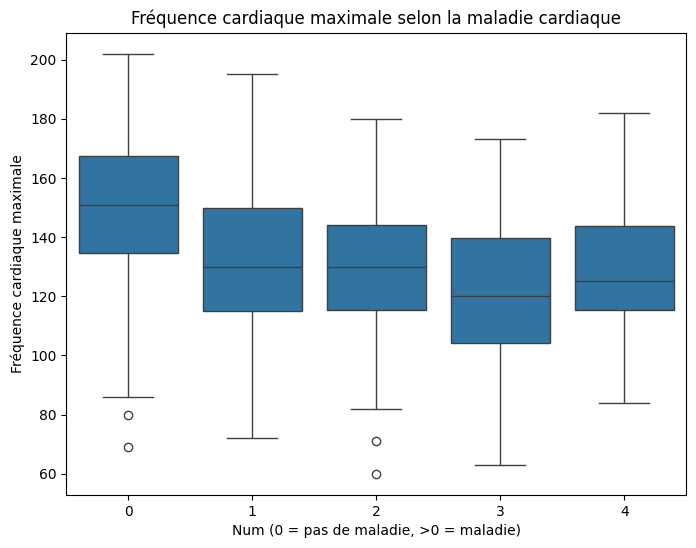

In [13]:
#Fréquence cardiaque maximale (thalch)
plt.figure(figsize=(8,6))
sns.boxplot(x='num', y='thalch', data=df)
plt.title("Fréquence cardiaque maximale selon la maladie cardiaque")
plt.xlabel("Num (0 = pas de maladie, >0 = maladie)")
plt.ylabel("Fréquence cardiaque maximale")
plt.show()

In [15]:
#Corrélation entre colonnes numériques
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Afficher les colonnes sélectionnées
df_numeric.columns


Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

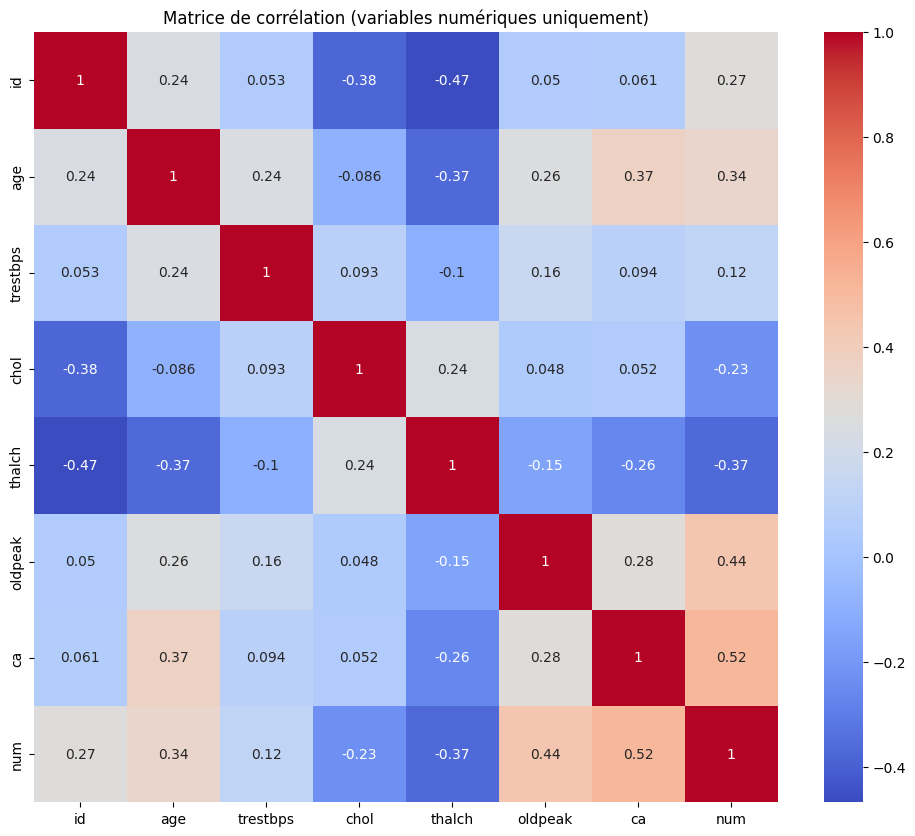

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation (variables numériques uniquement)")
plt.show()

In [17]:
#Analyser la variable num (maladie cardiaque)
# Créer une variable binaire : 0 = pas de maladie, 1 = maladie
df['disease'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

df[['num', 'disease']].head()

,num,disease
0,0,0
1,2,1
2,1,1
3,0,0
4,0,0


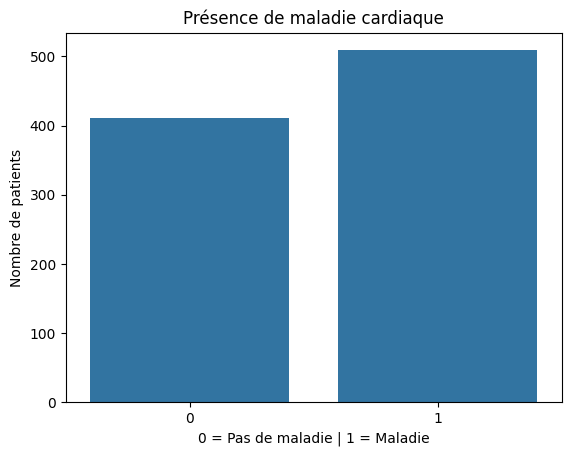

In [18]:
#Voir combien de patients sont malades
sns.countplot(x='disease', data=df)
plt.title("Présence de maladie cardiaque")
plt.xlabel("0 = Pas de maladie | 1 = Maladie")
plt.ylabel("Nombre de patients")
plt.show()

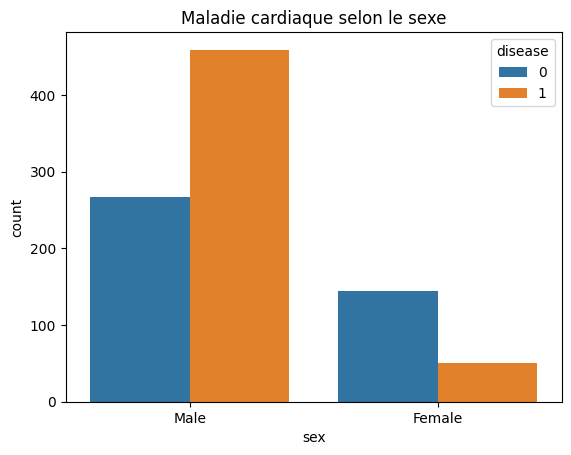

In [19]:
#Maladie selon le sexe (très intéressant cliniquement)
sns.countplot(x='sex', hue='disease', data=df)
plt.title("Maladie cardiaque selon le sexe")
plt.show()

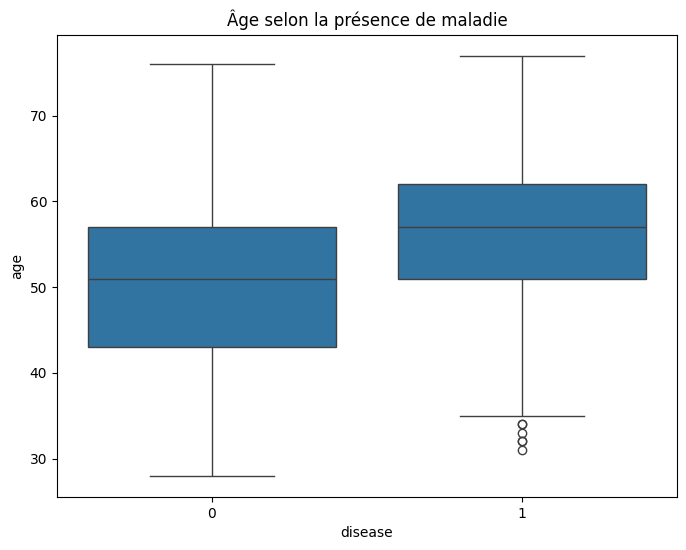

In [20]:
#Maladie selon l’âge
plt.figure(figsize=(8,6))
sns.boxplot(x='disease', y='age', data=df)
plt.title("Âge selon la présence de maladie")
plt.show()

In [21]:
#Nettoyage propre des données
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [24]:

df[['num','disease']].head()

,num,disease
0,0,0
1,2,1
2,1,1
3,0,0
4,0,0


In [25]:
#Séparer variable cible et variables explicatives
# Variables explicatives (features)
X = df.drop(columns=['num', 'disease'])

# Variable cible
y = df['disease']

X.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [26]:
#Encoder les variables catégorielles
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,67,160.0,286.0,108.0,1.5,3.0,True,False,False,False,...,False,False,False,False,False,True,True,False,True,False
2,67,120.0,229.0,129.0,2.6,2.0,True,False,False,False,...,False,False,False,False,False,True,True,False,False,True
3,37,130.0,250.0,187.0,3.5,0.0,True,False,False,False,...,True,False,False,True,False,False,False,False,True,False
4,41,130.0,204.0,172.0,1.4,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [27]:
#Séparer train / test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42
)

In [29]:
X_encoded.isnull().sum().sort_values(ascending=False)

,0
ca,611
oldpeak,62
trestbps,59
thalch,55
chol,30
age,0
sex_Male,0
dataset_Hungary,0
dataset_Switzerland,0
dataset_VA Long Beach,0
